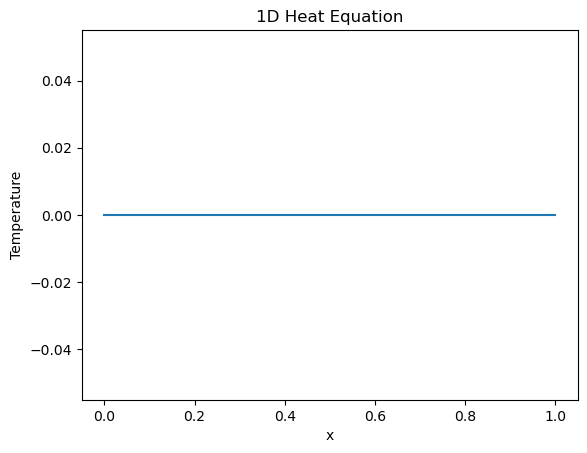

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the variables
L = 1.0  # Length of the domain
nx = 100  # Number of grid points
dx = L / nx  # Grid spacing
x = np.linspace(0, L, nx+1)  # Grid points
dt = 0.01  # Time step
t = 0.0  # Initial time
nt = 1000  # Number of time steps
alpha = 0.01  # Thermal diffusivity
T0 = 1.0  # Initial temperature
T = np.zeros(nx+1)  # Temperature array
T[0] = T[-1] = 0.0  # Boundary conditions

# Define the matrices for the finite difference method
A = np.zeros((nx+1, nx+1))
A[0, 0] = A[-1, -1] = 1.0
for i in range(1, nx):
    A[i, i-1] = A[i, i+1] = alpha * dt / dx**2
    A[i, i] = 1.0 - 2.0 * alpha * dt / dx**2

# Solve the heat equation
for n in range(nt):
    T = np.dot(A, T)
    T[0] = T[-1] = 0.0
    t += dt

# Plot the results
plt.plot(x, T)
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('1D Heat Equation')
plt.show()


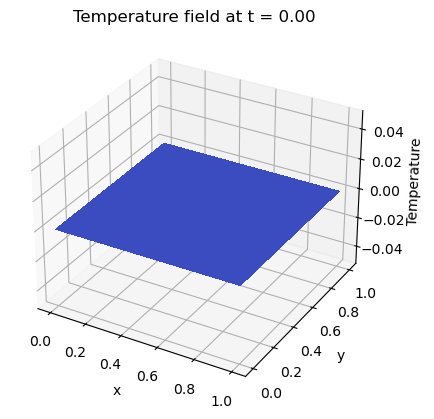

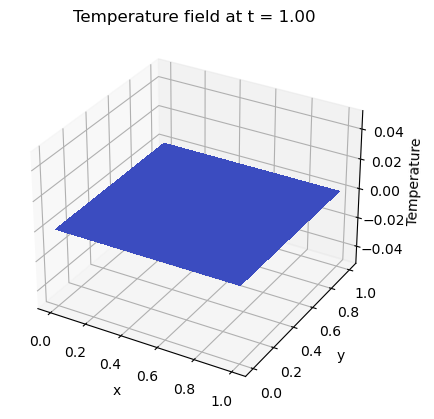

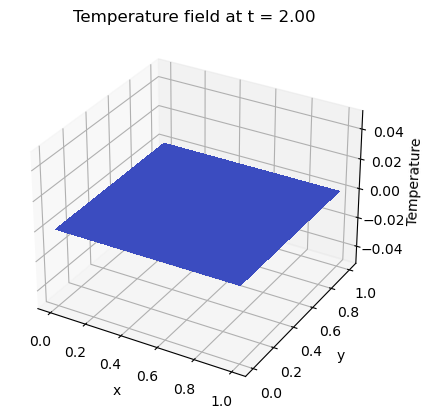

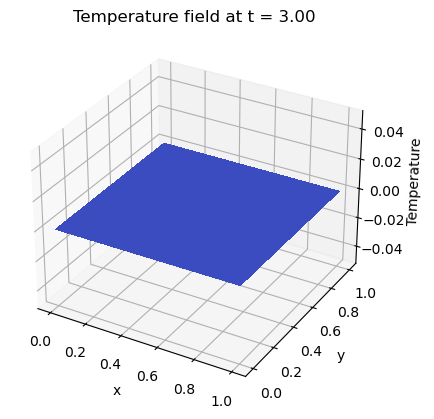

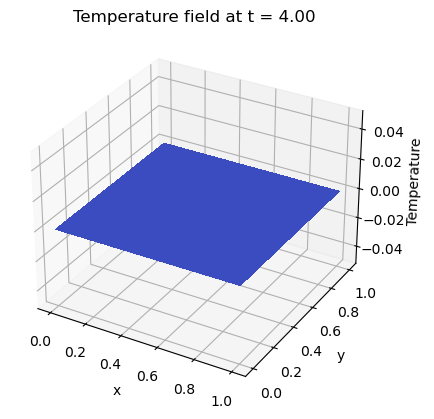

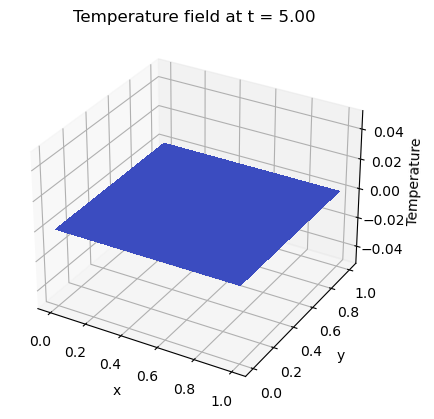

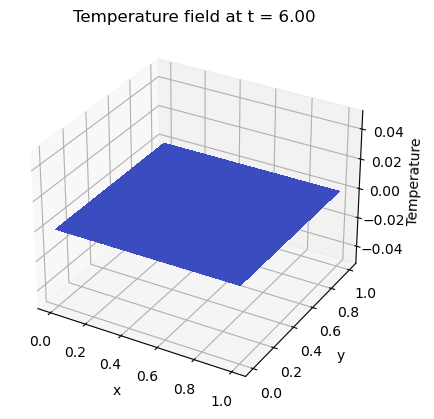

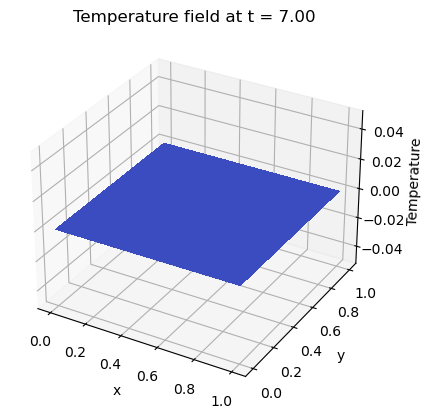

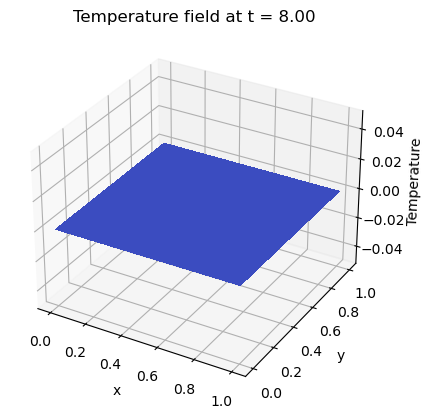

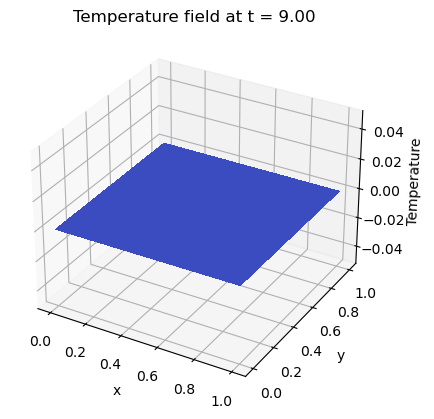

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from ipywidgets import interactive, HBox, VBox
import ipywidgets as widgets

# Define the function to solve the 1D heat equation using finite differences
def solve_1d_heat_equation(L, nx, alpha, nt, T0):
    # Define the variables
    dx = L / nx  # Grid spacing
    x = np.linspace(0, L, nx+1)  # Grid points
    dt = 0.01  # Time step
    t = 0.0  # Initial time
    T = np.zeros(nx+1)  # Temperature array
    T[0] = T[-1] = 0.0  # Boundary conditions
    T[1:-1] = T0  # Initial condition

    # Define the matrix for the finite difference method
    Ax = np.zeros((nx+1, nx+1))
    Ax[0, 0] = Ax[-1, -1] = 1.0
    for i in range(1, nx):
        Ax[i, i-1] = Ax[i, i+1] = alpha * dt / dx**2
        Ax[i, i] = 1

    # Time loop for solving the heat equation
    for n in range(nt):
        Tn = T.copy()
        b = Tn[1:-1] + alpha * dt / dx**2 * (Tn[2:] - 2 * Tn[1:-1] + Tn[:-2])
        T[1:-1] = np.linalg.solve(Ax, b)
        T[0] = T[-1] = 0.0

    # Plot the temperature distribution
    plt.plot(x, T)
    plt.xlabel('x')
    plt.ylabel('Temperature')
    plt.show()

# Define the function to solve the 2D heat equation using finite differences
def solve_2d_heat_equation(Lx, Ly, nx, ny, alpha, nt, T0):
    # Define the variables
    dx = Lx / nx  # Grid spacing in x direction
    dy = Ly / ny  # Grid spacing in y direction
    x = np.linspace(0, Lx, nx+1)  # Grid points in x direction
    y = np.linspace(0, Ly, ny+1)  # Grid points in y direction
    dt = 0.01  # Time step
    t = 0.0  # Initial time
    T = np.zeros((nx+1, ny+1))  # Temperature array
    T[0, :] = T[-1, :] = T[:, 0] = T[:, -1] = 0.0  # Boundary conditions
    T[1:-1, 1:-1] = T0  # Initial condition

    # Define the matrices for the finite difference method
    Ax = np.zeros((nx+1, nx+1))
    Ax[0, 0] = Ax[-1, -1] = 1.0
    # Solve the heat equation using finite difference method
for n in range(nt):
    Tn = T.copy()
    T[1:-1, 1:-1] = Tn[1:-1, 1:-1] + alpha * dt * (
        (Tn[1:-1, 2:] - 2*Tn[1:-1, 1:-1] + Tn[1:-1, :-2]) / dx**2 +
        (Tn[2:, 1:-1] - 2*Tn[1:-1, 1:-1] + Tn[:-2, 1:-1]) / dy**2)
    T[0, :] = T[-1, :] = T[:, 0] = T[:, -1] = 0.0  # Boundary conditions

    # Plot the temperature field every 100 time steps
    if n % 100 == 0:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        X, Y = np.meshgrid(x, y)
        surf = ax.plot_surface(X, Y, T, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('Temperature')
        ax.set_title(f'Temperature field at t = {n*dt:.2f}')
        plt.show()

